In [ ]:
%%capture
!pip install --upgrade pandas==1.3.4

In [ ]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sn
from matplotlib import style
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from google.colab import drive #Allows to mount drive
from google.colab import files #import files

Before we have loaded the data into colab we have cleaned parts of the data. There where some values with the value '[1-4]' that have been changes to 2 in excel to find a values that are in the middle of the values.
This cleaning part could also have been done in python by using the 'RE = r'^(\d{1})'.
\d represents any digit, and {1} repeats this rule once. The ^ character matches the start of a string, and the parentheses denote a capturing group, which tells pandas to extract that part of RE. The ^ character is used to avoid cases where [ starts off the string. Then would the result of this have been 1, which is in the low end of the interval. 
Another way to handle this could also be to look at '[1-4]' as a unvalid value.
No matter which method that are used, it is important to remember and consider this while analysising the data.

In excel the dots is removed and the decimal comma is changes to a dots by using replace all.

While getting familiar with the data, it is noticed that there are no other strings in the dataset than the columnnames, rownames and the 'NaN'values.

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
missing_values = ["NaN", "-"]
data = pd.read_csv('/content/covidBranche_utf.csv',sep=';', na_values = missing_values)
#https://www.machinelearningplus.com/pandas/pandas-dropna-how-to-drop-missing-values/

Visualize data

In [ ]:
data

,Branche. alder eller arbejdstilknytning,Antal i kategorien,Variabel,10 2020,11 2020,12 2020,13 2020,14 2020,15 2020,16 2020,17 2020,18 2020,19 2020,20 2020,21 2020,22 2020,23 2020,24 2020,25 2020,26 2020,27 2020,28 2020,29 2020,30 2020,31 2020,32 2020,33 2020,34 2020,35 2020,36 2020,37 2020,38 2020,39 2020,40 2020,41 2020,42 2020,43 2020,44 2020,45 2020,46 2020,...,9 2021,10 2021,11 2021,12 2021,13 2021,14 2021,15 2021,16 2021,17 2021,18 2021,19 2021,20 2021,21 2021,22 2021,23 2021,24 2021,25 2021,26 2021,27 2021,28 2021,29 2021,30 2021,31 2021,32 2021,33 2021,34 2021,35 2021,36 2021,37 2021,38 2021,39 2021,40 2021,41 2021,42 2021,43 2021,44 2021,45 2021,46 2021,47 2021,48 2021
0,A Landbrug. skovbrug og fiskeri,42969.0,Tests,NaN,19.00,19.00,21.00,49.00,77.00,71.00,179.00,264.00,217.00,212.00,270.00,259.00,223.00,298.00,369.00,399.00,404.00,369.00,432.00,417.00,575.00,775.00,920.00,1026.00,1164.00,1165.00,1678.00,1702.00,1730.00,1490.00,1580.00,1335.00,1877.00,2187.00,2019.00,2371.00,...,4150.00,4354.00,4544.00,4157.00,4419.00,4882.00,5051.00,5072.00,4974.00,5352.00,5589.00,5347.00,5027.00,4573.00,3928.00,3231.00,2762.00,2792.00,2896.00,2699.00,2259.00,2083.00,1856.00,1700.00,1846.00,1706.00,1442.00,1265.00,1108.00,968.00,1008.00,1074.00,1513.00,1797.00,2533.00,3463.00,4400.00,4571.00,4988.00,5130.00
1,A Landbrug. skovbrug og fiskeri,42969.0,Smittede,NaN,2.00,0.00,0.00,2.00,2.00,0.00,2.00,2.00,2.00,2.00,0.00,0.00,0.00,0.00,2.00,2.00,0.00,0.00,0.00,0.00,2.00,5.00,2.00,2.00,5.00,8.00,21.00,12.00,25.00,35.00,42.00,43.00,80.00,80.00,55.00,114.00,...,14.00,15.00,21.00,17.00,48.00,25.00,34.00,25.00,33.00,39.00,47.00,32.00,40.00,15.00,18.00,9.00,8.00,7.00,17.00,29.00,19.00,25.00,10.00,28.00,19.00,18.00,9.00,14.00,10.00,25.00,23.00,27.00,31.00,40.00,47.00,71.00,109.00,144.00,123.00,140.00
2,A Landbrug. skovbrug og fiskeri,42969.0,Positivpct,NaN,NaN,0.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,0.00,0.00,NaN,0.65,NaN,NaN,0.43,0.69,1.25,0.71,1.45,2.35,2.66,3.22,4.26,3.66,2.72,4.81,...,0.34,0.34,0.46,0.41,1.09,0.51,0.67,0.49,0.66,0.73,0.84,0.60,0.80,0.33,0.46,0.28,0.29,0.25,0.59,1.07,0.84,1.20,0.54,1.65,1.03,1.06,0.62,1.11,0.90,2.58,2.28,2.51,2.05,2.23,1.86,2.05,2.48,3.15,2.47,2.73
3,A Landbrug. skovbrug og fiskeri,42969.0,Incidens,NaN,NaN,0.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,0.00,0.00,NaN,11.64,NaN,NaN,11.64,18.62,48.87,27.93,58.18,81.45,97.74,100.07,186.18,186.18,128.00,265.31,...,32.58,34.91,48.87,39.56,111.71,58.18,79.13,58.18,76.80,90.76,109.38,74.47,93.09,34.91,41.89,20.95,18.62,16.29,39.56,67.49,44.22,58.18,23.27,65.16,44.22,41.89,20.95,32.58,23.27,58.18,53.53,62.84,72.15,93.09,109.38,165.24,253.67,335.13,286.25,325.82
4,B Råstofindvinding,3868.0,Tests,2.00,5.00,NaN,NaN,8.00,12.00,17.00,24.00,51.00,52.00,35.00,66.00,49.00,93.00,109.00,151.00,179.00,204.00,203.00,217.00,204.00,248.00,227.00,249.00,287.00,277.00,299.00,319.00,379.00,353.00,305.00,281.00,262.00,279.00,322.00,326.00,334.00,...,902.00,883.00,950.00,995.00,985.00,1260.00,1273.00,1344.00,1299.00,1388.00,1378.00,1271.00,1236.00,1057.00,862.00,686.00,665.00,654.00,624.00,541.00,454.00,424.00,453.00,363.00,420.00,410.00,303.00,235.00,426.00,402.00,362.00,302.00,314.00,342.00,499.00,592.00,745.00,777.00,877.00,935.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,z4 Over 65 år,1039539.0,Smittede,5.00,58.00,213.00,390.00,438.00,267.00,218.00,255.00,144.00,91.00,59.00,43.00,56.00,37.00,47.00,36.00,43.00,17.00,12.00,28.00,25.00,29.00,44.00,42.00,23.00,38.00,80.00,190.00,230.00,255.00,197.00,240.00,309.00,386.00,501.00,498.00,518.00,...,237.00,191.00,222.00,264.00,263.00,264.00,199.00,193.00,199.00,219.00,177.00,128.00,86.00,74.00

Removes the last two lines in the dataset. These lines do not contain information to the data, but information for the user of the dataset which a one of the first steps in data cleaning

In [ ]:
data = data.drop([96,97])

Replace '-' in the dataset with 'NaN', to identify how many NaN that there are in the dataset

Size of the dataset

In [ ]:
data.shape

(96, 95)

Rename columns so that they are easier to work with and make them more intuitive

In [ ]:
data = data.rename(columns={"Antal i kategorien": "N"})

In [ ]:
data = data.rename(columns={"Branche. alder eller arbejdstilknytning": "Branche"})

To reshape the data pivot is used twice and melt is used once

In [ ]:
pivot_test = data.pivot(index=['Branche','N'],columns=['Variabel'])

The second step in data cleaning to to create a index by using the index function from Numpy that allow more versatile slicing and labelling. In some cases, it is helpful to use a uniquely valued identifying field of the data as its index.

reset-index() will set the indices in order and starts from 0. It makes it esaier to work with a dataframe and if the default index is changed to some other values it can be an advantages to use reset-index().

In [ ]:
pivot_test = pivot_test.reset_index()

In [ ]:
test1 = pd.melt(pivot_test,id_vars=['Branche','N'])

In [ ]:
test1

,Branche,N,NaN,Variabel,value
0,A Landbrug. skovbrug og fiskeri,42969.0,10 2020,Incidens,NaN
1,B Råstofindvinding,3868.0,10 2020,Incidens,0.00
2,C Industri,308499.0,10 2020,Incidens,2.92
3,D Energiforsyning,11025.0,10 2020,Incidens,NaN
4,E Vandforsyning og renovation,12399.0,10 2020,Incidens,0.00
...,...,...,...,...,...
8827,X Uoplyst aktivitet,45362.0,48 2021,Tests,9512.00
8828,z1 Selvforsørgende 18-65 år,303406.0,48 2021,Tests,43797.00
8829,z2 Ydelsesmodtagere 18-65 år,661393.0,48 2021,Tests,83258.00
8830,z3 Under 18 år,1039125.0,48 2021,Tests,247418.00


In [ ]:
test1.columns.values[2] = 'Week'

In [ ]:
test1 = test1.reset_index()

In [ ]:
data['1 2021']

0      2430.00
1        42.00
2         1.73
3        97.74
4       406.00
        ...   
91      151.09
92    65370.00
93     1549.00
94        2.37
95      149.01
Name: 1 2021, Length: 96, dtype: float64

In [ ]:
df = test1.pivot(index=['Branche','Week','N'],columns='Variabel',values='value')

In [ ]:
df

Variabel                                           Incidens  ...    Tests
Branche                         Week    N                    ...         
A Landbrug. skovbrug og fiskeri 1 2021  42969.0       97.74  ...   2430.0
                                10 2020 42969.0         NaN  ...      NaN
                                10 2021 42969.0       34.91  ...   4354.0
                                11 2020 42969.0         NaN  ...     19.0
                                11 2021 42969.0       48.87  ...   4544.0
...                                                     ...  ...      ...
z4 Over 65 år                   53 2020 1039539.0    199.03  ...  56921.0
                                6 2021  1039539.0     23.18  ...  58389.0
                                7 2021  1039539.0     22.99  ...  65392.0
                                8 2021  1039539.0     25.20  ...  81820.0
                                9 2021  1039539.0     22.80  ...  85123.0

[2208 rows x 4 columns]

Above we see the final reshaped tabular with the columns 'Branche', 'Week', 'N', 'Variabel', 'Incidens', 'Positivpct', 'Smittet' and 'Tests'. 'N' and 'Variabel' is in the same column which is nessesary while using pivot() to make sure that the tabular is shaped in the right way and no data information is changes or lost. 

The most common reason that there are missing data:
*   User forgot to fill in a field
*   Data was lost while transferring manually from a legacy database
*   Programming error

Now we knwo the resons why there are missing data, but the next step is to identify the missing values which is done by using is.null(). is.null() return if there is a missing value. If there are a missing value the function return true else false. 

#https://www.machinelearningplus.com/pandas/pandas-dropna-how-to-drop-missing-values/
#https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b

In [ ]:
df['Incidens'].isnull()


Branche                          Week     N        
A Landbrug. skovbrug og fiskeri  1 2021   42969.0      False
                                 10 2020  42969.0       True
                                 10 2021  42969.0      False
                                 11 2020  42969.0       True
                                 11 2021  42969.0      False
                                                       ...  
z4 Over 65 år                    53 2020  1039539.0    False
                                 6 2021   1039539.0    False
                                 7 2021   1039539.0    False
                                 8 2021   1039539.0    False
                                 9 2021   1039539.0    False
Name: Incidens, Length: 2208, dtype: bool

In [ ]:
df['Incidens']

Branche                          Week     N        
A Landbrug. skovbrug og fiskeri  1 2021   42969.0       97.74
                                 10 2020  42969.0         NaN
                                 10 2021  42969.0       34.91
                                 11 2020  42969.0         NaN
                                 11 2021  42969.0       48.87
                                                        ...  
z4 Over 65 år                    53 2020  1039539.0    199.03
                                 6 2021   1039539.0     23.18
                                 7 2021   1039539.0     22.99
                                 8 2021   1039539.0     25.20
                                 9 2021   1039539.0     22.80
Name: Incidens, Length: 2208, dtype: float64

Above it is shown that the is.null() function capture the missing values. 
The misssing values is shown with the yellow lines in the figure below. 
The reasons that there only are missing values in the value colunm is because it is only in our values there there are missing data. All the weeks, N, Branche and so on are known. So in this figure, it is shown that there only are missing values in the value categorty. 

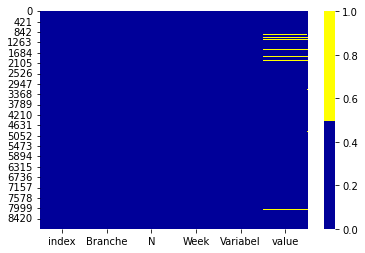

In [ ]:
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sn.heatmap(test1.isnull(), cmap=sn.color_palette(colours))

To get a better overview of the missing values the sum() is used. It gives an overview that in incidens there are 212 missing values, Positivpct has 212, Smittede and Tests both has 3 missing values. So in all there are 430 missing values in the dataset.

In [ ]:
df.isnull().sum()

Variabel
Incidens      212
Positivpct    212
Smittede        3
Tests           3
dtype: int64

The next step is to handle the missing values. 
In this case it is decied to remove all the rows with a missing number. 
Another way, could be to replace all the missing value with a specifik number.

The reason for removing the missing values is because of many of the missing values are from the begining of 2020 and the point of interest if the vaccine that got unrolled at the end of 2020. 

In [ ]:
df = df.dropna()
df

#https://www.machinelearningplus.com/pandas/pandas-dropna-how-to-drop-missing-values/ 

Variabel                                           Incidens  ...    Tests
Branche                         Week    N                    ...         
A Landbrug. skovbrug og fiskeri 1 2021  42969.0       97.74  ...   2430.0
                                10 2021 42969.0       34.91  ...   4354.0
                                11 2021 42969.0       48.87  ...   4544.0
                                12 2020 42969.0        0.00  ...     19.0
                                12 2021 42969.0       39.56  ...   4157.0
...                                                     ...  ...      ...
z4 Over 65 år                   53 2020 1039539.0    199.03  ...  56921.0
                                6 2021  1039539.0     23.18  ...  58389.0
                                7 2021  1039539.0     22.99  ...  65392.0
                                8 2021  1039539.0     25.20  ...  81820.0
                                9 2021  1039539.0     22.80  ...  85123.0

[1996 rows x 4 columns]

In [ ]:
df.to_csv('BrancheData.csv') 
files.download('BrancheData.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>